In [ ]:
#importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import cm
import geopandas as gpd
import plotly.express as px
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING
import plotly.graph_objects as go

from IPython.display import HTML,display
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

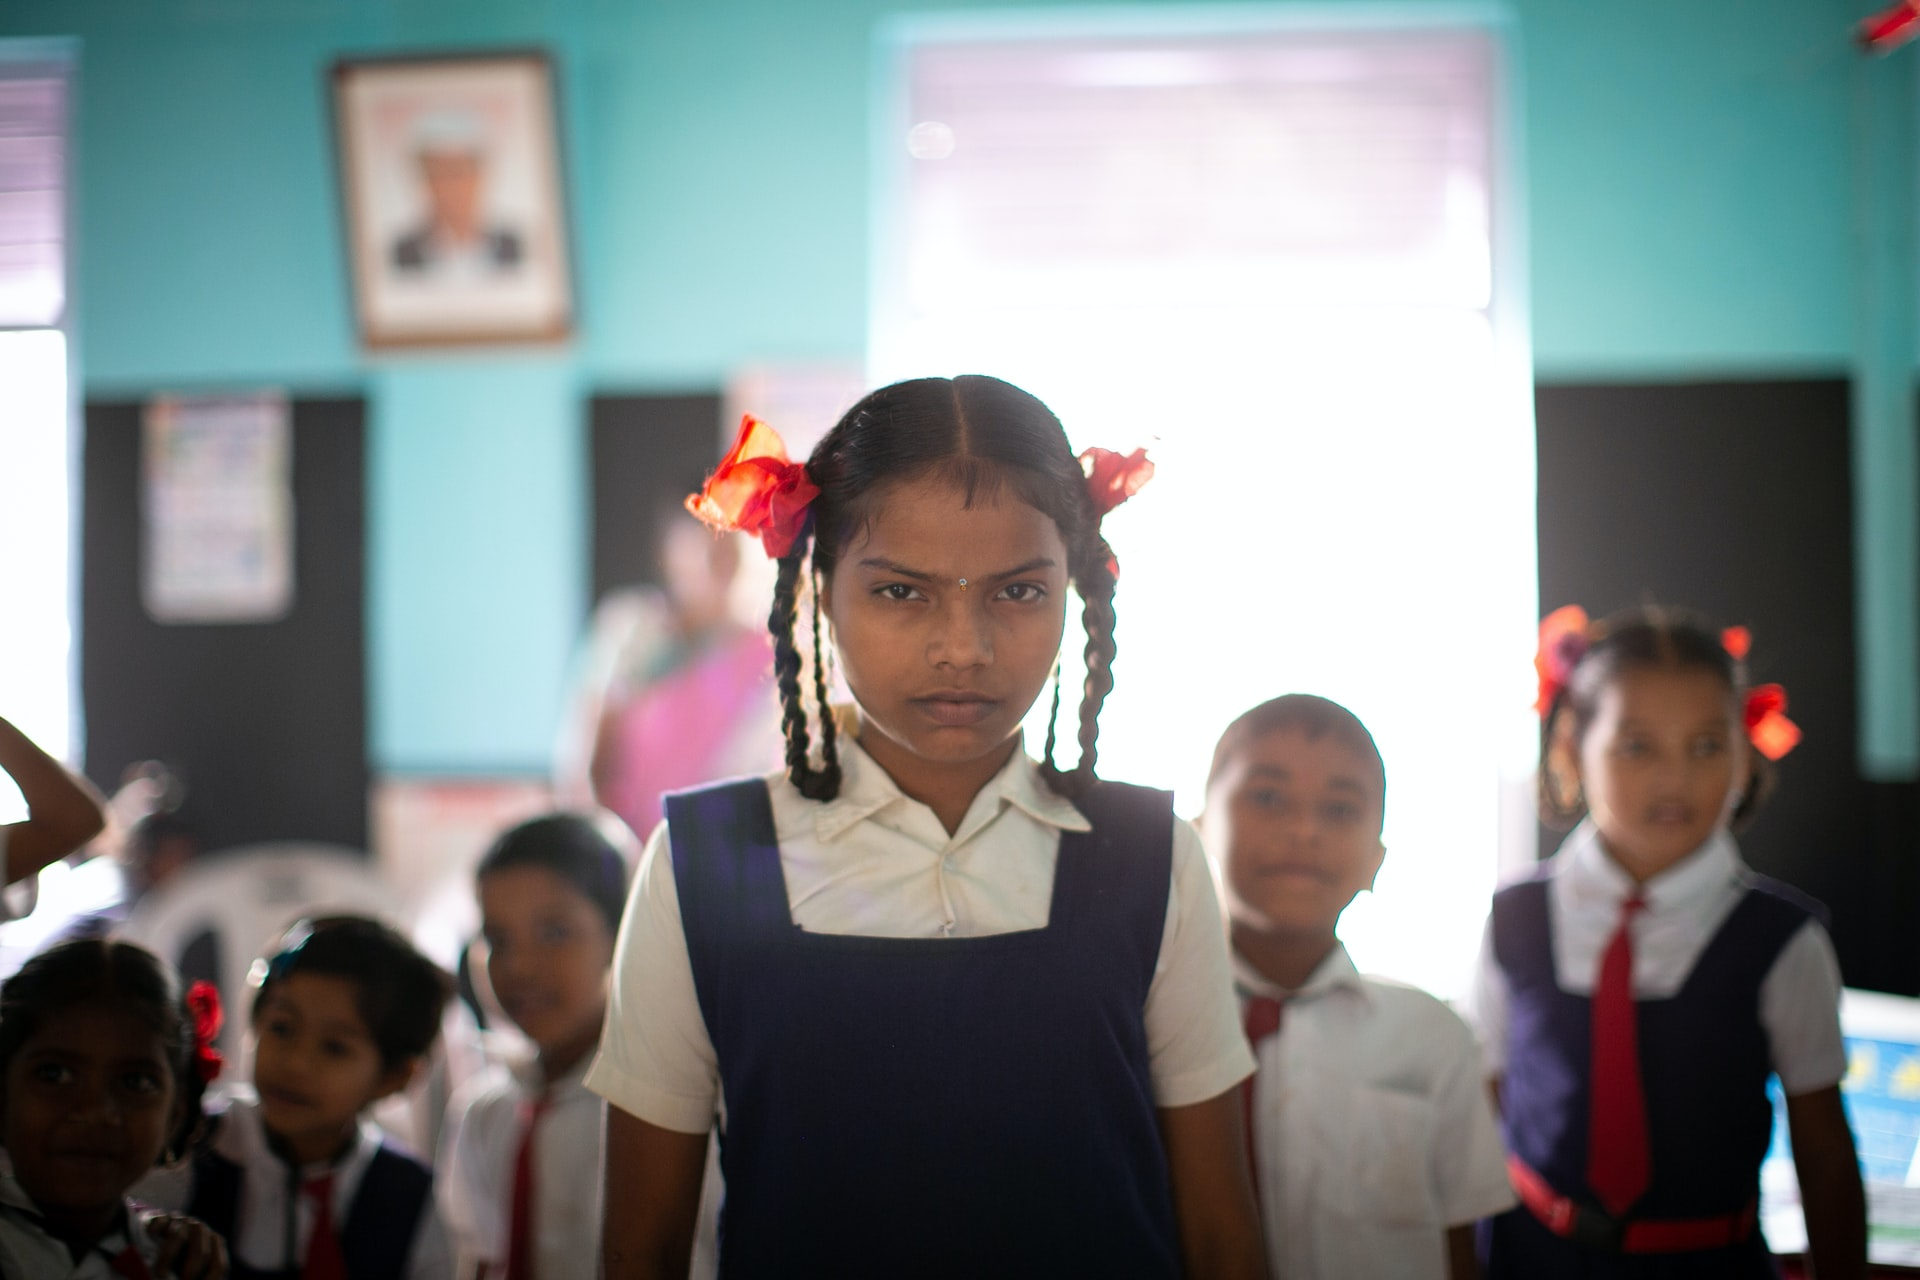

# Introduction

 In this notebook we are  going to analyze the Indian Education System. Main focus of this analysis will be on The Enrollment and Dropout Ratio of Schools over the years. We also try find out if there is any correlation between basic amneties in school (water, electricity etc.) and the enrollment/dropout ratios. Indian education System is divided into four main parts.
 
 1) **Primary** : The Primary Education in India consists of students studying in Class I-IV. 
  
 
 2) **Upper Primary**: The Upper Primary Education in India  consists of students studying in Class V-VIII.The Indian government lays emphasis on primary education (Class I-VIII) also referred to as elementary education, to children aged 6 to 14 years old. 
 
 3) **Secondary**: Secondary education in India begins after eight years of elementary education and is divided into two years of secondary education (classes IX and X) and two years of Higher secondary education (classes XI and XII)
 
 
 4) **Higher Secondary**: Higher Secondary Education consists of students studying in Class XI & XII.
 
 **Gross Enrollment Ratio**:  Number of students enrolled in a given level of education, regardless of age, expressed as a percentage of the official school-age population corresponding to the same level of education.

 **Dropout Ratio** : The percentage of students failing to complete a particular school or college course. 
 
 The Indian government has took many steps to increase the enrollment ratio of students . Steps like Right to Education Policy for primary school students.The government also runs "Go to school Campaign" to motivate young students to attend regular classes.

In [ ]:
#Reading the datasets
enroll = pd.read_csv("../input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv")


drop = pd.read_csv("../input/indian-school-education-statistics/dropout-ratio-2012-2015.csv")

water = pd.read_csv("../input/indian-school-education-statistics/percentage-of-schools-with-water-facility-2013-2016.csv")

gtoilet = pd.read_csv("../input/indian-school-education-statistics/schools-with-girls-toilet-2013-2016.csv")

btoilet = pd.read_csv("../input/indian-school-education-statistics/schools-with-boys-toilet-2013-2016.csv")

comps = pd.read_csv("../input/indian-school-education-statistics/percentage-of-schools-with-comps-2013-2016.csv")

electrs = pd.read_csv("../input/indian-school-education-statistics/percentage-of-schools-with-electricity-2013-2016.csv")





# Enrollment 

In [ ]:
enroll.head()

The given dataset contains the information about male and female school enrollment ratio statewise. The data is only for three education years. These years are 2013-2014, 2014-2015 & 2015-2016.

lets see the enrollment ratio of boys and girls over the years.

In [ ]:
aienroll = enroll[enroll['State_UT']== 'All India']

#reindexing the rows
aienroll = aienroll.reindex([35,109,72])

enroll = enroll[enroll['State_UT']!= 'All India']

In [ ]:
baienroll = aienroll.iloc[:,[0,1,2,5,8,11]]
baienroll = pd.melt(baienroll, id_vars=['State_UT', 'Year'], value_vars= baienroll.iloc[:,2:6])

gaienroll = aienroll.iloc[:,[0,1,3,6,9,12]]
gaienroll = pd.melt(gaienroll, id_vars=['State_UT', 'Year'], value_vars= gaienroll.iloc[:,2:6])

In [ ]:
plt.style.use('fivethirtyeight')
f, axes = plt.subplots(1, 2, figsize=(20, 10))

ax1 = sns.barplot(x = 'Year' , y = "value" ,hue = "variable", data = baienroll, palette = 'Pastel2', edgecolor = 'black',ax=axes[0])
ax1.set(ylim=(40, 120))
axes[0].set_title('Enrollment ratio of Boys in India',size = 20 , pad = 20)
axes[0].set_ylabel('Enrollment ratio')
ax1.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
for p in ax1.patches:
             ax1.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13.5, color='black', xytext=(0, 8),
                 textcoords='offset points')
ax2 = sns.barplot(x = 'Year' , y = "value" ,hue = "variable", data = gaienroll, palette = 'Pastel2', edgecolor = 'black',ax=axes[1])
ax2.set(ylim=(40, 120))
axes[1].set_title('Enrollment ratio of Girls in India',size = 20 , pad = 20)
axes[1].set_ylabel('Enrollment ratio')
ax2.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
for p in ax2.patches:
             ax2.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13.5, color='black', xytext=(0, 8),
                 textcoords='offset points')

**Inference** : Over the years Gross Enrollment Ratio for both boys and girls increasing over the years except for the primary schools. The decrease of enrollment ratio is worrying as government took many steps to motivate students to attend primary schools.

Enrollment ratio is more in primary schools as compared to the next level of education enrollment. When it comes to high school enrollment ratio its lowest among other level of education, its almost half of the enrollment ratio of primary schools. 





**Statewise Analysis for Enrollment**

In [ ]:
enroll.State_UT = enroll.State_UT.str.capitalize()
enroll = enroll.replace('Pondicherry', 'Puducherry', regex=True)
enroll = enroll.replace('NR', 0, regex=True)
enroll = enroll.replace('@', 0, regex=True)



In [ ]:
columns = ['Higher_Secondary_Boys', 'Higher_Secondary_Girls','Higher_Secondary_Total']
for i , col in enumerate(columns):
    enroll[col] = enroll[col].astype(float)


In [ ]:
enrol = enroll.copy()
enroll = enroll.replace('2013-14', 2013, regex=True)
enroll = enroll.replace('2014-15', 2014, regex=True)
enroll = enroll.replace('2015-16', 2015, regex=True)
enroll = enroll.sort_values('Year', ascending = True)

In [ ]:
enroll15 = enroll[enroll.Year == 2015]

In [ ]:
prit = enroll15.sort_values('Primary_Total', ascending = False)
uprit = enroll15.sort_values('Upper_Primary_Total', ascending = False)
sec = enroll15.sort_values('Secondary_Total', ascending = False)
hsec = enroll15.sort_values('Higher_Secondary_Total', ascending = False)

In [ ]:
prit = pd.melt(prit, id_vars=['State_UT', 'Year'], value_vars= prit.iloc[:,2:4])
uprit = pd.melt(uprit, id_vars=['State_UT', 'Year'], value_vars= uprit.iloc[:,5:7])
sec = pd.melt(sec, id_vars=['State_UT', 'Year'], value_vars= sec.iloc[:,8:10])
hsec = pd.melt(hsec, id_vars=['State_UT', 'Year'], value_vars= hsec.iloc[:,11:13])

In [ ]:
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'value', y ='State_UT',hue = 'variable',data = prit, palette ='dark')
ax.set(xlim=(60, 158))
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Enrollment ratio in Primary Schools (2015-2016)',size = 20 , pad = 20)
plt.ylabel('State/UT')
plt.xlabel('Enrollment Ratio')


In [ ]:
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'value', y ='State_UT',hue = 'variable',data = uprit, palette ='dark')
ax.set(xlim=(60, 158))
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Enrollment ratio in Upper Primary Schools(2015-2016)',size = 20 , pad = 20)
plt.ylabel('State/UT')
plt.xlabel('Enrollment Ratio')


In [ ]:
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'value', y ='State_UT',hue = 'variable',data = sec, palette ='dark')
ax.set(xlim=(60, 130))
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Enrollment ratio in Secondary Schools  (2015-2016)',size = 20 , pad = 20)
plt.ylabel('State/UT')
plt.xlabel('Enrollment Ratio')


In [ ]:
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'value', y ='State_UT',hue = 'variable',data = hsec, palette ='dark')
ax.set(xlim=(20, 120))
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Enrollment ratio in Higher Secondary Schools (2015-2016)',size = 20 , pad = 20)
plt.ylabel('State/UT')
plt.xlabel('Enrollment Ratio')


**Enrollment over the Years**

In [ ]:
enrollp = enroll.iloc[:,[0,1,4]]
enrollup = enroll.iloc[:,[0,1,7]]
enrolls = enroll.iloc[:,[0,1,10]]
enrollhs = enroll.iloc[:,[0,1,13]]

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z= enrollp['Primary_Total'],
                   x=enrollp['Year'],
                   y= enrollp['State_UT'],
                   hoverongaps = False))
fig.update_layout(
    title_text= '<b>Enrollment ratio in Primary Schools<b>',
    title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2013,2014,2015],
        ticktext = ['2013-2014','2014-2015','2015-2016']),
    
    autosize=False,
    width= 700,
    height=1000,
    paper_bgcolor='aqua',
    plot_bgcolor = "aqua",
    
    )
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z= enrollup['Upper_Primary_Total'],
                   x=enrollup['Year'],
                   y= enrollup['State_UT'],
                   hoverongaps = False))
fig.update_layout(
    title_text= '<b>Enrollment ratio in Upper Primary Schools<b>',
    title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2013,2014,2015],
        ticktext = ['2013-2014','2014-2015','2015-2016']),
    
    autosize=False,
    width= 700,
    height=1000,
    paper_bgcolor='aqua',
    plot_bgcolor = "aqua",
    
    )
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z= enrolls['Secondary_Total'],
                   x=enrolls['Year'],
                   y= enrolls['State_UT'],
                   hoverongaps = False))
fig.update_layout(
    title_text= '<b>Enrollment ratio in Secondary Schools<b>',
    title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2013,2014,2015],
        ticktext = ['2013-2014','2014-2015','2015-2016']),
    
    autosize=False,
    width= 700,
    height=1000,
    paper_bgcolor='aqua',
    plot_bgcolor = "aqua",
    
    )
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z= enrollhs['Higher_Secondary_Total'],
                   x=enrollhs['Year'],
                   y= enrollhs['State_UT'],
                   hoverongaps = False))
fig.update_layout(
    title_text= '<b>Enrollment ratio in Higher Secondary Schools<b>',
    title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2013,2014,2015],
        ticktext = ['2013-2014','2014-2015','2015-2016']),
    
    autosize=False,
    width= 700,
    height=1000,
    paper_bgcolor='aqua',
    plot_bgcolor = "aqua",
    
    )
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

# Dropout

In [ ]:
drop.head()

In [ ]:
drop = drop.replace('NR', 0, regex=True)
drop = drop.replace('Uppe_r_Primary', 0, regex=True)
aidrop = drop[drop.State_UT=='All India']
drop = drop[drop.State_UT!='All India']
drop.State_UT = drop.State_UT.str.capitalize()


In [ ]:
baidrop = aidrop.iloc[:,[0,1,2,5,8,11]]
baidrop = pd.melt(baidrop, id_vars=['State_UT', 'year'], value_vars= baidrop.iloc[:,2:6])

gaidrop = aidrop.iloc[:,[0,1,3,6,9,12]]
gaidrop = pd.melt(gaidrop, id_vars=['State_UT', 'year'], value_vars= gaidrop.iloc[:,2:6])

In [ ]:
plt.style.use('fivethirtyeight')
f, axes = plt.subplots(1, 2, figsize=(20, 10))

ax1 = sns.barplot(x = 'year' , y = "value" ,hue = "variable", data = baidrop, palette = 'Pastel1', edgecolor = 'black',ax=axes[0])
ax1.set(ylim=(0, 20))
axes[0].set_title('Dropout ratio of Boys in India',size = 20 , pad = 20)
axes[0].set_ylabel('Dropout ratio')
ax1.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
for p in ax1.patches:
             ax1.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13.5, color='black', xytext=(0, 8),
                 textcoords='offset points')
ax2 = sns.barplot(x = 'year' , y = "value" ,hue = "variable", data = gaidrop, palette = 'Pastel1', edgecolor = 'black',ax=axes[1])
ax2.set(ylim=(0, 20))
axes[1].set_title('Dropout ratio of Girls in India',size = 20 , pad = 20)
axes[1].set_ylabel('Dropout ratio')
ax2.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
for p in ax2.patches:
             ax2.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13.5, color='black', xytext=(0, 8),
                 textcoords='offset points')

In [ ]:
columns = ['Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total']

for i , col in enumerate(columns):
    drop[col] = drop[col].astype(float)

In [ ]:
dro = drop.copy()
drop = drop.replace('2012-13', 2013, regex=True)
drop = drop.replace('2013-14', 2014, regex=True)
drop = drop.replace('2014-15', 2015, regex=True)
drop = drop.sort_values('year', ascending = True)

In [ ]:
drop15 = drop[drop.year == 2015]

In [ ]:
prid = drop15.sort_values('Primary_Total', ascending = False)
uprid = drop15.sort_values('Upper Primary_Total', ascending = False)
secd = drop15.sort_values('Secondary _Total', ascending = False)
hsecd = drop15.sort_values('HrSecondary_Total', ascending = False)

In [ ]:
prid = pd.melt(prid, id_vars=['State_UT', 'year'], value_vars= prid.iloc[:,2:4])
uprid = pd.melt(uprid, id_vars=['State_UT', 'year'], value_vars= uprid.iloc[:,5:7])
secd = pd.melt(secd, id_vars=['State_UT', 'year'], value_vars= secd.iloc[:,8:10])
hsecd = pd.melt(hsecd, id_vars=['State_UT', 'year'], value_vars= hsecd.iloc[:,11:13])

In [ ]:
prid = prid[prid.value > 0]
uprid = uprid[uprid.value > 0]
secd = secd[secd.value > 0]
hsecd = hsecd[hsecd.value > 0]

**Primary Dropout**

In [ ]:
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'value', y ='State_UT',hue = 'variable',data = prid, palette ='colorblind')
#ax.set(xlim=(20, 120))
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Dropout ratio in Primary Schools (2014-2015)',size = 20 , pad = 20)
plt.ylabel('State/UT')
plt.xlabel('Dropout Ratio')


In [ ]:
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'value', y ='State_UT',hue = 'variable',data = uprid, palette ='colorblind')
#ax.set(xlim=(20, 120))
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Dropout ratio in Upper Primary Schools (2014-2015)',size = 20 , pad = 20)
plt.ylabel('State/UT')
plt.xlabel('Dropout Ratio')

In [ ]:
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'value', y ='State_UT',hue = 'variable',data = secd, palette ='colorblind')
#ax.set(xlim=(20, 120))
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Dropout ratio in Secondery Schools (2014-2015)',size = 20 , pad = 20)
plt.ylabel('State/UT')
plt.xlabel('Dropout Ratio')

In [ ]:
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'value', y ='State_UT',hue = 'variable',data = hsecd, palette ='colorblind')
#ax.set(xlim=(20, 120))
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Dropout ratio in Higher Secondery Schools (2014-2015)',size = 20 , pad = 20)
plt.ylabel('State/UT')
plt.xlabel('Dropout Ratio')

In [ ]:
drop = drop.replace('Tamil  nadu', 'Tamil nadu', regex=True)
drop = drop.replace('Arunachal  pradesh', 'Arunachal pradesh', regex=True)

In [ ]:
dropp = drop.iloc[:,[0,1,4]]
dropup = drop.iloc[:,[0,1,7]]
drops = drop.iloc[:,[0,1,10]]
drophs = drop.iloc[:,[0,1,13]]

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z= dropp['Primary_Total'],
                   x=dropp['year'],
                   y= dropp['State_UT'],
                   hoverongaps = False))
fig.update_layout(
    title_text= '<b>Dropout ratio in Primary Schools<b>',
    title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2013,2014,2015],
        ticktext = ['2012-2013','2013-2014','2014-2015']),
    
    autosize=False,
    width= 700,
    height=1000,
    paper_bgcolor='aquamarine',
    plot_bgcolor = "aquamarine",
    
    )
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z= dropup['Upper Primary_Total'],
                   x=dropup['year'],
                   y= dropup['State_UT'],
                   hoverongaps = False))
fig.update_layout(
    title_text= '<b>Dropout ratio in Upper Primary Schools<b>',
    title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2013,2014,2015],
        ticktext = ['20012-2013','2013-2014','2014-2015']),
    
    autosize=False,
    width= 700,
    height=1000,
    paper_bgcolor='aquamarine',
    plot_bgcolor = "aquamarine",
    
    )
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z= drops['Secondary _Total'],
                   x=drops['year'],
                   y= drops['State_UT'],
                   hoverongaps = False))
fig.update_layout(
    title_text= '<b>Dropout ratio in Secondary Schools<b>',
    title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2013,2014,2015],
        ticktext = ['20012-2013','2013-2014','2014-2015']),
    
    autosize=False,
    width= 700,
    height=1000,
    paper_bgcolor='aquamarine',
    plot_bgcolor = "aquamarine",
    
    )
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z= drophs['HrSecondary_Total'],
                   x=drophs['year'],
                   y= drophs['State_UT'],
                   hoverongaps = False))
fig.update_layout(
    title_text= '<b>Dropout ratio in Higher Secondary Schools<b>',
    title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2013,2014,2015],
        ticktext = ['20012-2013','2013-2014','2014-2015']),
    
    autosize=False,
    width= 700,
    height=1000,
    paper_bgcolor='aquamarine',
    plot_bgcolor = "aquamarine",
    
    )
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

# Amneties in School (Water, Computers , Electricity & Toilets)

**Computers**

In [ ]:

comps.State_UT = comps.State_UT.str.capitalize()
com = comps[comps.State_UT == 'All india']
com = com.iloc[:,[0,1,2,5,9,11,12]]
com = pd.melt(com, id_vars=['State_UT', 'year'], value_vars= com.iloc[:,2:6])

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,8))

ax1 = sns.barplot(x = 'year' , y = "value" ,hue = "variable", data = com, palette = 'Accent', edgecolor = 'black')
ax1.set(ylim=(0, 60))
plt.title('Percentage of Schools with Computers',size = 20 , pad = 20)
plt.ylabel('Percentage')
ax1.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
for p in ax1.patches:
             ax1.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13.5, color='black', xytext=(0, 8),
                 textcoords='offset points')

In [ ]:
comps = comps[comps.State_UT != 'All india']
comps = comps.iloc[:,[0,1,2,5,9,11,12]]
comps.columns = [str(col) + '_comp' for col in comps.columns]
new_df = pd.merge(enrol, comps,  how='left', left_on=['State_UT','Year'], right_on = ['State_UT_comp','year_comp'])
dnew_df = pd.merge(dro, comps,  how='left', left_on=['State_UT','year'], right_on = ['State_UT_comp','year_comp'])

In [ ]:
water['State/UT'] = water['State/UT'].str.capitalize()
wat = water[water['State/UT']=='All india']
wat = wat.iloc[:,[0,1,2,5,9,11,12]]
wat = pd.melt(wat, id_vars=['State/UT', 'Year'], value_vars= wat.iloc[:,2:6])

In [ ]:
water['State/UT'] = water[water['State/UT']!='All india']
water = water.iloc[:,[0,1,2,5,9,11,12]]
water.columns = [str(col) + '_water' for col in water.columns]
new_df2 = pd.merge(new_df, water,  how='left', left_on=['State_UT','Year'], right_on = ['State/UT_water','Year_water'])
dnew_df2 = pd.merge(dnew_df, water,  how='left', left_on=['State_UT','year'], right_on = ['State/UT_water','Year_water'])

In [ ]:
electrs.State_UT = electrs.State_UT.str.capitalize()
electr = electrs[electrs.State_UT == 'All india']
electr = electr.iloc[:,[0,1,2,5,9,11,12]]
electr = pd.melt(electr, id_vars=['State_UT', 'year'], value_vars= electr.iloc[:,2:6])

**Water and Electricity**

In [ ]:
plt.style.use('fivethirtyeight')
f, axes = plt.subplots(1, 2, figsize=(20, 10))

ax1 = sns.barplot(x = 'Year' , y = "value" ,hue = "variable", data = wat, palette = 'Blues', edgecolor = 'black',ax=axes[0])
ax1.set(ylim=(40, 120))
axes[0].set_title('Percentage of Schools with Water',size = 20 , pad = 20)
axes[0].set_ylabel('Percentage')
ax1.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
for p in ax1.patches:
             ax1.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11.5, color='black', xytext=(0, 8),
                 textcoords='offset points')
ax2 = sns.barplot(x = 'year' , y = "value" ,hue = "variable", data = electr, palette = 'Greens', edgecolor = 'black',ax=axes[1])
ax2.set(ylim=(0, 120))
axes[1].set_title('Percentage of Schools with Electricity',size = 20 , pad = 20)
axes[1].set_ylabel('Percentage')
ax2.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
for p in ax2.patches:
             ax2.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11.5, color='black', xytext=(0, 8),
                 textcoords='offset points')

In [ ]:
electrs = electrs[electrs.State_UT != 'All india']
electrs = electrs.iloc[:,[0,1,2,5,9,11,12]]
electrs.columns = [str(col) + '_electr' for col in electrs.columns]
new_df3 = pd.merge(new_df2, electrs,  how='left', left_on=['State_UT','Year'], right_on = ['State_UT_electr','year_electr'])
dnew_df3 = pd.merge(dnew_df2, electrs,  how='left', left_on=['State_UT','year'], right_on = ['State_UT_electr','year_electr'])

In [ ]:
gtoilet.State_UT = gtoilet.State_UT.str.capitalize()
gtoil = gtoilet[gtoilet.State_UT == 'All india']
gtoil = gtoil.iloc[:,[0,1,2,5,9,11,12]]
gtoil = pd.melt(gtoil, id_vars=['State_UT', 'year'], value_vars= gtoil.iloc[:,2:6])


In [ ]:
gtoilet = gtoilet[gtoilet.State_UT != 'All india']
gtoilet = gtoilet.iloc[:,[0,1,2,5,9,11,12]]
gtoilet.columns = [str(col) + '_gtoil' for col in gtoilet.columns]
new_df4 = pd.merge(new_df3, gtoilet,  how='left', left_on=['State_UT','Year'], right_on = ['State_UT_gtoil','year_gtoil'])
dnew_df4 = pd.merge(dnew_df3, gtoilet,  how='left', left_on=['State_UT','year'], right_on = ['State_UT_gtoil','year_gtoil'])

In [ ]:
btoilet.State_UT = btoilet.State_UT.str.capitalize()
btoil = btoilet[btoilet.State_UT == 'All india']
btoil = btoil.iloc[:,[0,1,2,5,9,11,12]]
btoil = pd.melt(btoil, id_vars=['State_UT', 'year'], value_vars= btoil.iloc[:,2:6])


**Boys and Girls Toilet**

In [ ]:
plt.style.use('fivethirtyeight')
f, axes = plt.subplots(1, 2, figsize=(20, 10))

ax1 = sns.barplot(x = 'year' , y = "value" ,hue = "variable", data = gtoil, palette = 'Greens', edgecolor = 'black',ax=axes[0])
ax1.set(ylim=(50, 120))
axes[0].set_title('Percentage of Schools with Girls Toilet',size = 20 , pad = 20)
axes[0].set_ylabel('Percentage')
ax1.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
for p in ax1.patches:
             ax1.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11.5, color='black', xytext=(0, 8),
                 textcoords='offset points')
ax2 = sns.barplot(x = 'year' , y = "value" ,hue = "variable", data = btoil, palette = 'Greens', edgecolor = 'black',ax=axes[1])
ax2.set(ylim=(50, 120))
axes[1].set_title('Percentage of Schools with Boys Toilet',size = 20 , pad = 20)
axes[1].set_ylabel('Percentage')
ax2.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
for p in ax2.patches:
             ax2.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11.5, color='black', xytext=(0, 8),
                 textcoords='offset points')

In [ ]:
btoilet = btoilet[btoilet.State_UT != 'All india']
btoilet = btoilet.iloc[:,[0,1,2,5,9,11,12]]
btoilet.columns = [str(col) + '_btoil' for col in btoilet.columns]

df = pd.merge(new_df4, btoilet,  how='left', left_on=['State_UT','Year'], right_on = ['State_UT_btoil','year_btoil'])

df2 = pd.merge(dnew_df4, btoilet,  how='left', left_on=['State_UT','year'], right_on = ['State_UT_btoil','year_btoil'])

In [ ]:
dthis = ['State_UT_btoil','year_btoil','State_UT_gtoil','year_gtoil','State_UT_electr',
         'year_electr','State/UT_water','Year_water','State_UT_comp','year_comp']
df = df.drop(dthis, axis=1)
df = df.dropna()

df2 = df2.drop(dthis, axis=1)
df2 = df2.dropna()

In [ ]:
df.head()

**Correlation with Enrollment Ratio**

In [ ]:
correlation = df.corr()

In [ ]:
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
plt.title("Correlations of Enrollment Ratio")
sns.heatmap(correlation, annot= False)

In [ ]:
correlation['All Schools_comp'].sort_values(ascending=False)

In [ ]:
correlation['All Schools_water'].sort_values(ascending=False)

In [ ]:
correlation['All Schools_electr'].sort_values(ascending=False)

In [ ]:
correlation['All Schools_btoil'].sort_values(ascending=False)

In [ ]:
correlation['All Schools_gtoil'].sort_values(ascending=False)

**Correlation with Dropout Ratio**

In [ ]:
df2.head()

In [ ]:
correlation2 = df2.corr()
plt.figure(figsize = (14,15))
plt.title("Correlations of Dropout Ratio")
plt.style.use("fivethirtyeight")
sns.heatmap(correlation2, annot= False)

In [ ]:
correlation2['All Schools_comp'].sort_values(ascending=False)

In [ ]:
correlation2['All Schools_water'].sort_values(ascending=False)

In [ ]:
correlation2['All Schools_electr'].sort_values(ascending=False)

In [ ]:
correlation2['All Schools_btoil'].sort_values(ascending=False)

In [ ]:
correlation2['All Schools_gtoil'].sort_values(ascending=False)